In [16]:
import pandas as pd
#pc=pd.read_csv("../principal_components.csv").drop(columns=['nao'])
pc0=pc[pc['type']==0]
pc1=pc[pc['type']==1]

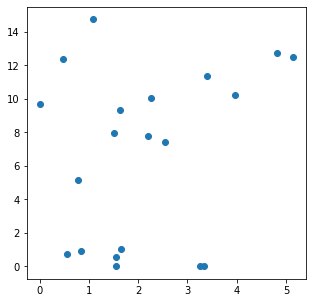

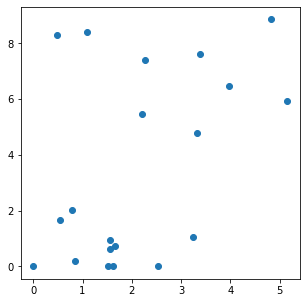

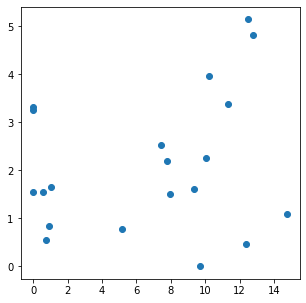

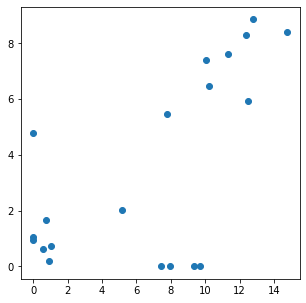

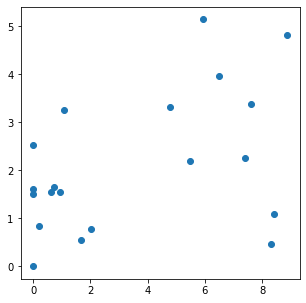

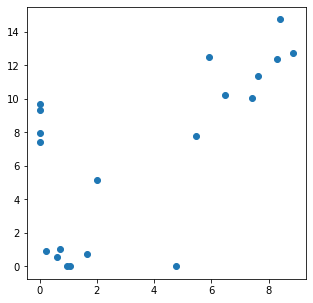

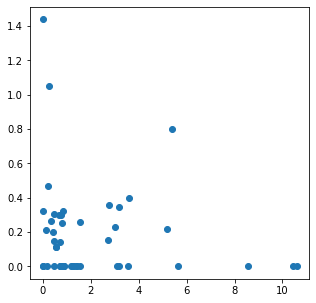

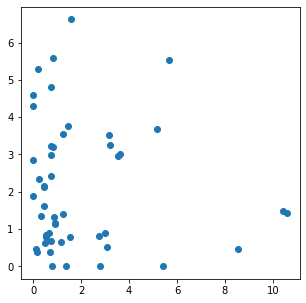

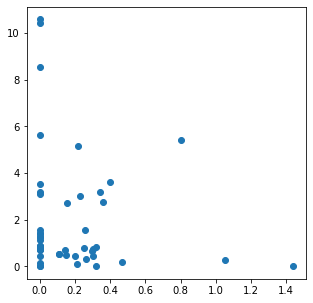

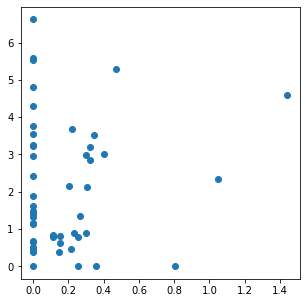

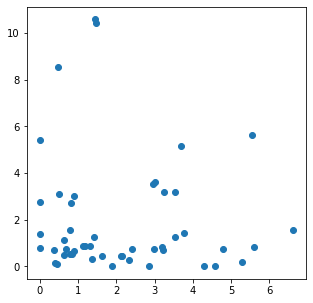

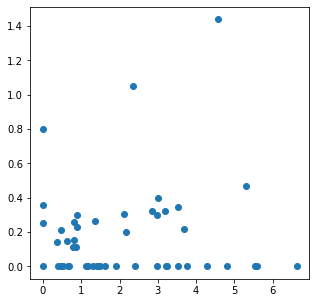

In [17]:
import os

os.system("rm ./pa_plot/*")

import matplotlib.pyplot as plt
for name1 in pc1.columns[1:]:
    for name2 in pc1.columns[1:]:
        if name1 != name2:
            plt.figure(figsize=(5, 5))
            plt.scatter(x=pc1[name1], y=pc1[name2])
            plt.savefig("./pa_plot/1_{}_{}.png".format(name1, name2))
            
            
for name1 in pc0.columns[1:]:
    for name2 in pc0.columns[1:]:
        if name1 != name2:
            plt.figure(figsize=(5, 5))
            plt.scatter(x=pc0[name1], y=pc0[name2])
            plt.savefig("./pa_plot/0_{}_{}.png".format(name1, name2))


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
# max_sil = -10000
# max_cal = -10000
# max_name1 = ''
# max_name2 = ''
# max_k
for name1 in pc0.columns[1:]:
    for name2 in pc0.columns[1:]:
        if name1 != name2:
            for k in range(2, 5):
                # 聚类数量
                x = pc0[[name1, name2]]
                cluster = KMeans(n_clusters=k, random_state=10).fit(x)
                # 访问labels_属性，获得聚类结果
                y_pred = cluster.labels_
                centroid = cluster.cluster_centers_
                # 计算平均轮廓系数
                sil = silhouette_score(x, y_pred)
                # 值越大，说明同类样本相距约近，不同样本相距越远，则聚类效果越好
                cal = calinski_harabasz_score(x, y_pred)
                # 结果值越大，聚类效果越好

                print("类别1：{}类别2：{}k：{}轮廓系数：{}cal系数：{}".format(name1, name2, k, sil, cal))


类别1：cuo类别2：kok：2轮廓系数：0.7550365392244225cal系数：125.30640506080684
类别1：cuo类别2：kok：3轮廓系数：0.7386326743018893cal系数：255.98606082632818
类别1：cuo类别2：kok：4轮廓系数：0.7332160613242745cal系数：313.9270151882339
类别1：cuo类别2：caok：2轮廓系数：0.6038769864191111cal系数：47.44362687546058
类别1：cuo类别2：caok：3轮廓系数：0.4757813233675871cal系数：56.95435227345486
类别1：cuo类别2：caok：4轮廓系数：0.5165986353227799cal系数：69.22616407772263
类别1：ko类别2：cuok：2轮廓系数：0.7550365392244225cal系数：125.30640506080684
类别1：ko类别2：cuok：3轮廓系数：0.7386326743018893cal系数：255.98606082632818
类别1：ko类别2：cuok：4轮廓系数：0.7332160613242745cal系数：313.9270151882339
类别1：ko类别2：caok：2轮廓系数：0.6315342387070079cal系数：124.45330409158372
类别1：ko类别2：caok：3轮廓系数：0.6086022585470156cal系数：156.22147927489428
类别1：ko类别2：caok：4轮廓系数：0.5298165271879347cal系数：159.017935087202
类别1：cao类别2：cuok：2轮廓系数：0.6038769864191111cal系数：47.44362687546058
类别1：cao类别2：cuok：3轮廓系数：0.4757813233675871cal系数：56.95435227345486
类别1：cao类别2：cuok：4轮廓系数：0.51659863532278cal系数：69.22616407772263
类别1：cao类别2：kok：2轮廓系数：0.6315342387070079cal系数：1

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
# max_sil = -10000
# max_cal = -10000
# max_name1 = ''
# max_name2 = ''
# max_k
for name1 in pc1.columns[1:]:
    for name2 in pc1.columns[1:]:
        if name1 != name2:
            for k in range(2, 5):
                # 聚类数量
                x = pc1[[name1, name2]]
                cluster = KMeans(n_clusters=k, random_state=10).fit(x)
                # 访问labels_属性，获得聚类结果
                y_pred = cluster.labels_
                centroid = cluster.cluster_centers_
                # 计算平均轮廓系数
                sil = silhouette_score(x, y_pred)
                # 值越大，说明同类样本相距约近，不同样本相距越远，则聚类效果越好
                cal = calinski_harabasz_score(x, y_pred)
                # 结果值越大，聚类效果越好

                print("类别1：{}类别2：{}k：{}轮廓系数：{}cal系数：{}".format(
                    name1, name2, k, sil, cal))


类别1：cuo类别2：kok：2轮廓系数：0.6600144731376482cal系数：67.52198775222882
类别1：cuo类别2：kok：3轮廓系数：0.5390538287119024cal系数：68.48168135816388
类别1：cuo类别2：kok：4轮廓系数：0.5729115883293922cal系数：69.44730008089567
类别1：cuo类别2：caok：2轮廓系数：0.6871471013837567cal系数：76.53788366825727
类别1：cuo类别2：caok：3轮廓系数：0.5766690937014199cal系数：60.07412699020237
类别1：cuo类别2：caok：4轮廓系数：0.5461855891249562cal系数：54.44161758413288
类别1：ko类别2：cuok：2轮廓系数：0.6600144731376479cal系数：67.52198775222882
类别1：ko类别2：cuok：3轮廓系数：0.5390538287119024cal系数：68.48168135816388
类别1：ko类别2：cuok：4轮廓系数：0.5729115883293922cal系数：69.44730008089567
类别1：ko类别2：caok：2轮廓系数：0.5745149402382984cal系数：36.940084731200386
类别1：ko类别2：caok：3轮廓系数：0.6659394463769946cal系数：75.47506573015217
类别1：ko类别2：caok：4轮廓系数：0.574410189361713cal系数：74.60398461574562
类别1：cao类别2：cuok：2轮廓系数：0.6871471013837567cal系数：76.53788366825727
类别1：cao类别2：cuok：3轮廓系数：0.5766690937014199cal系数：60.07412699020237
类别1：cao类别2：cuok：4轮廓系数：0.5461855891249561cal系数：54.44161758413288
类别1：cao类别2：kok：2轮廓系数：0.5745149402382984cal系数：36.9